In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 
import datetime

In [2]:
data_path = '../../kaggleData/JD_logging/'
feature_path = '../../kaggleData/JD_logging/features/'

In [7]:
login_train = pd.read_csv(data_path+'t_login.csv')
trade_train = pd.read_csv(data_path+'t_trade.csv')

In [4]:
login_train.head(10)

,log_id,timelong,device,log_from,ip,city,result,timestamp,type,id,is_scan,is_sec,time
0,2.618369e+15,5.0,879361,10,1026491,194,1,1.428642e+09,1,116825,True,False,2015-04-10 12:54:19
1,9.969739e+14,16124.0,835072,1,1026491,194,1,1.428809e+09,1,109987,False,False,2015-04-12 11:20:45
2,8.123343e+15,5.0,879361,10,1026491,194,1,1.427705e+09,1,116825,True,False,2015-03-30 16:38:20
3,3.265677e+14,6.0,879361,10,1026491,194,1,1.428309e+09,1,116825,True,False,2015-04-06 16:22:18
4,6.684659e+15,4.0,879361,10,1026491,194,1,1.428221e+09,1,116825,True,False,2015-04-05 15:55:01
5,8.828481e+15,5.0,736541,10,1026491,194,1,1.428220e+09,1,116825,True,False,2015-04-05 15:48:07
6,6.071119e+15,13000.0,979465,2,1026491,194,1,1.431851e+09,3,116825,False,False,2015-05-17 16:27:55
7,8.525176e+15,17627.0,765534,1,1026491,194,1,1.426584e+09,1,109987,False,False,2015-03-17 17:19:04
8,3.120145e+15,12000.0,12239,2,1026491,194,1,1.427789e+09,3,116825,False,False,2015-03-31 15:58:48
9,5.367905e+15,9146.0,556157,1,1026491,194,31,1.431252e+09,1,109987,False,False,2015-05-10 18:06:52


In [5]:
trade_train

,rowkey,time,id,is_risk
0,3,2015-01-01 00:00:41.0,27863,0
1,6,2015-01-01 00:00:46.0,115201,0
2,13,2015-01-01 00:01:02.0,143711,0
3,32,2015-01-01 00:03:00.0,172699,0
4,43,2015-01-01 00:03:52.0,53265,0
5,67,2015-01-01 00:05:51.0,18231,0
6,94,2015-01-01 00:10:12.0,147174,0
7,98,2015-01-01 00:10:48.0,141674,0
8,116,2015-01-01 00:13:16.0,105324,0
9,147,2015-01-01 00:19:07.0,168749,0


In [ ]:
print login_train.shape
print trade_train.shape

(595645, 13)
(132719, 4)


In [46]:
login_test = pd.read_csv(data_path+'t_login_test.csv')
trade_test = pd.read_csv(data_path+'t_trade_test.csv')
print login_test.shape
print trade_test.shape

(87748, 13)
(17875, 3)


In [ ]:
login_train['from'] = 'train'
login_test['from'] = 'test'
trade_train['from'] = 'train'
trade_test['from'] = 'test'

In [ ]:
login_tt = pd.concat([login_train,login_test])
trade_tt = pd.concat([trade_train.drop('is_risk',axis = 1),trade_test])

In [3]:
#trade_tt.to_csv(data_path+'trade_tt.csv')
#login_tt.to_csv(data_path+'login_tt.csv')
login_tt = pd.read_csv(data_path+'login_tt.csv')
trade_tt = pd.read_csv(data_path+'trade_tt.csv')

# trade表 

## label比例

In [11]:
safe_num = trade_train.shape[0] - trade_train['is_risk'].sum()
at_risk_num = trade_train['is_risk'].sum()
print u"安全交易数量、比例：",safe_num, safe_num*1.0/trade_train.shape[0]
print u"异常交易数量、比例：",at_risk_num , at_risk_num*1.0/trade_train.shape[0]

安全交易数量、比例： 129076 0.972551028865
异常交易数量、比例： 3643 0.0274489711345


In [12]:
safe_num = trade_train.shape[0] - trade_train['is_risk'].sum()
at_risk_num = trade_train['is_risk'].sum()
print u"安全交易数量、比例：",safe_num, safe_num*1.0/trade_train.shape[0]
print u"异常交易数量、比例：",at_risk_num , at_risk_num*1.0/trade_train.shape[0]

安全交易数量、比例： 129076 0.972551028865
异常交易数量、比例： 3643 0.0274489711345


## ID重复

In [13]:
unique_in_train = trade_train['id'].unique().shape[0]
unique_in_test =  trade_test['id'].unique().shape[0]
unique_in_tt = trade_tt['id'].unique().shape[0]
print unique_in_train,unique_in_test,unique_in_tt
print  "number for IDs in train but not in test in train",(unique_in_tt - unique_in_test)
print u"train中后续不再出现的",(unique_in_tt - unique_in_test)*1.0/(unique_in_train)
print u"test中未在train中出现过的占test的比例",(unique_in_tt - unique_in_train)*1.0/(unique_in_test)

26044 7272 28065
number for IDs in train but not in test in train 20793
train中后续不再出现的 0.798379665182
test中未出现过的 0.277915291529


## ID出现次数的分布 

In [26]:
trade_train_id_times = trade_train[['id']].groupby('id').size()
trade_test_id_times = trade_test[['id']].groupby('id').size()

(array([ 14189.,   4520.,   1325.,   1767.,    604.,    801.,    626.,
           258.,    356.,    270.]),
 array([  1. ,   2.6,   4.2,   5.8,   7.4,   9. ,  10.6,  12.2,  13.8,
         15.4,  17. ]),
 <a list of 10 Patch objects>)

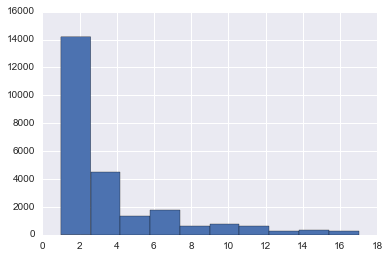

In [79]:
#login_id_times = login_tt[['id']].groupby('id').size()
qt_trade_train = trade_train_id_times.quantile(.95)
plt.hist(trade_train_id_times[trade_train_id_times< qt_trade_train])

(array([ 3712.,     0.,  1529.,     0.,   756.,     0.,   420.,     0.,
          277.,   150.]),
 array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ]),
 <a list of 10 Patch objects>)

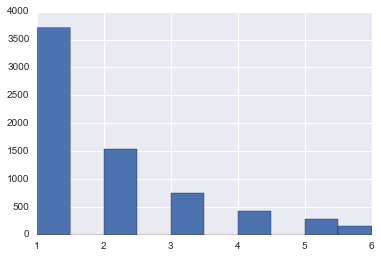

In [80]:
qt = trade_test_id_times.quantile(.95)
plt.hist(trade_test_id_times[trade_test_id_times< qt])

In [40]:
print "in train",trade_train_id_times.describe()
print "in test",trade_test_id_times.describe()

in train count    26044.000000
mean         5.095953
std         13.336597
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max       1095.000000
dtype: float64
in test count    7272.000000
mean        2.458058
std         3.288352
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max       125.000000
dtype: float64


<Container object of 28065 artists>

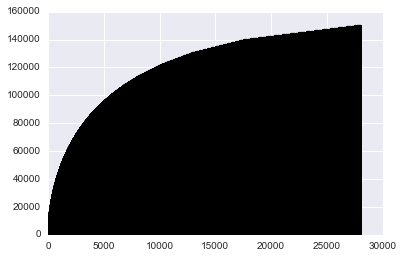

In [176]:
trade_id_times = trade_tt[['id']].groupby('id').size()
x = trade_id_times.sort_values(ascending = False).cumsum()
plt.bar(range(len(x)),x)

In [63]:
trade_id_times = trade_tt[['id']].groupby('id').size()

In [183]:
t = trade_test_id_times.sort_values(ascending = False)
t.iloc[10000]

4

## 异常值中同一ID的次数分布

In [62]:
risk_id_count =trade_train[trade_train['is_risk']==1].groupby('id').size()
plt.hist(risk_id_count)

(array([ 969.,   81.,   25.,    8.,    2.,    0.,    0.,    0.,    0.,    1.]),
 array([  1. ,   7.2,  13.4,  19.6,  25.8,  32. ,  38.2,  44.4,  50.6,
         56.8,  63. ]),
 <a list of 10 Patch objects>)

<Container object of 1086 artists>

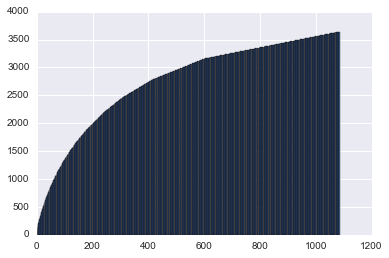

In [169]:
#显示从大到小的cumsum，看是否存在明显的8020
x = risk_id_count.sort_values(ascending = False).cumsum()
plt.bar(range(len(x)),x)

In [174]:
risk_id_count.sort_values(ascending = False).iloc[200]

5

## ID异常比例情况

使用此前的trade_id_times，risk_id_count

In [73]:
risk_id_count = risk_id_count.rename('risk_count')

In [75]:
trade_id_df = trade_id_times.reset_index().rename(columns = {0:'trade_counts'}).join(risk_id_count,on = 'id').fillna(0.0)

In [77]:
trade_id_df['risk_portion'] = trade_id_df['risk_count']/ trade_id_df['trade_counts']

In [79]:
mult_trade_id_df = trade_id_df[trade_id_df['trade_counts']>1]

In [80]:
print "trading id numbers, mult-times trading id numbers, trading_times, mult-time-trade id trading times "
print trade_id_df.shape[0],mult_trade_id_df.shape[0],trade_id_df['trade_counts'].sum(),mult_trade_id_df['trade_counts'].sum()

trading id numbers, mult-times trading id numbers, trading_times, mult-time-trade id trading times 
28065 17632 150594 140161


显然多次交易的账号占交易次数的大多数

In [84]:
#top n
top_risk = trade_id_df[trade_id_df['trade_counts'] > 1].sort_values(by = ['risk_portion','risk_count'],ascending = False)

In [85]:
top_risk = top_risk[top_risk['risk_portion']>0]

In [90]:
top_risk['risk_portion']

1727     1.000000
23229    1.000000
19040    1.000000
27188    1.000000
2286     1.000000
28007    1.000000
25996    1.000000
1640     1.000000
2409     1.000000
7562     1.000000
8911     1.000000
14652    1.000000
15498    1.000000
15740    1.000000
20848    1.000000
23441    1.000000
27753    1.000000
5282     1.000000
8801     1.000000
9565     1.000000
590      1.000000
20397    1.000000
25694    1.000000
24       1.000000
527      1.000000
2830     1.000000
7992     1.000000
8323     1.000000
13068    1.000000
19764    1.000000
           ...   
23210    0.083333
7406     0.076923
24904    0.076923
4327     0.071429
16053    0.071429
21043    0.071429
11031    0.066667
3918     0.066667
10456    0.066667
16254    0.066667
14467    0.064516
9038     0.062500
7407     0.061538
25399    0.058824
27611    0.055556
27776    0.050000
16406    0.041667
7073     0.040000
25463    0.040000
18481    0.038462
19561    0.038462
9263     0.037037
17963    0.037037
12511    0.035714
14889    0

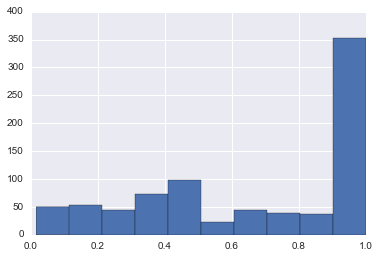

In [95]:
%matplotlib inline
p = plt.hist(np.array(top_risk['risk_portion']))
#plt.show()

In [103]:
p[0]

array([  50.,   54.,   45.,   74.,   99.,   23.,   45.,   39.,   37.,  352.])

In [104]:
p[1]

array([ 0.01515152,  0.11363636,  0.21212121,  0.31060606,  0.40909091,
        0.50757576,  0.60606061,  0.70454545,  0.8030303 ,  0.90151515,  1.        ])

In [108]:
q=[]
for i in range(10):
    q.append(p[1][i]+p[1][i+1])
x = np.array(q).dot(p[0])/2/(p[0].sum())

## Time重叠情况

In [4]:
trade_tt['time'] = trade_tt['time'].apply(lambda x : x[0:19]).apply(lambda x : datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))

In [42]:
print(trade_train['time'].min(),trade_train['time'].max())
print(trade_test['time'].min(),trade_test['time'].max())

('2015-01-01 00:00:40.0', '2015-06-30 23:56:39.0')
('2015-07-01 00:04:41.0', '2015-07-31 23:58:30.0')


## Time按不同时间范围分布

In [103]:
trade_tt['time_day'] = trade_tt['time'].apply(lambda x : x.day)

In [114]:
trade_tt['time_month'] = trade_tt['time'].apply(lambda x : x.month)

<Container object of 31 artists>

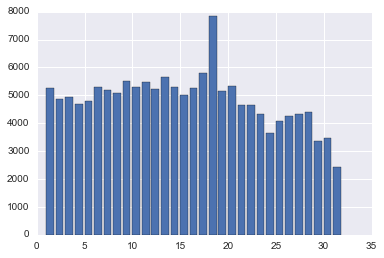

In [107]:
plt.bar(range(1,32,1),trade_tt.groupby('time_day').size())

<Container object of 31 artists>

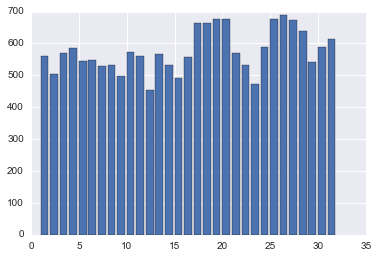

In [118]:
#查看test在7月的分布
plt.bar(range(1,32,1),trade_tt[trade_tt['from']=='test'].groupby('time_day').size())

In [120]:
#查看6月饼确认是否6.18的影响
temp = trade_tt.groupby(['time_day','time_month']).size().reset_index()
temp[temp['time_month'] == 6]

,time_day,time_month,0
5,1,6,1213
12,2,6,895
19,3,6,871
26,4,6,664
33,5,6,812
40,6,6,1032
47,7,6,963
54,8,6,898
61,9,6,1275
68,10,6,883


<Container object of 24 artists>

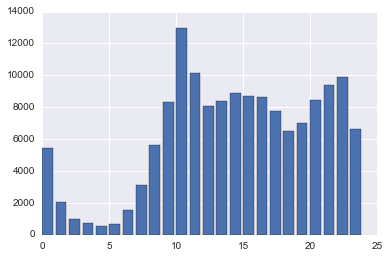

In [121]:
trade_tt['time_hour'] = trade_tt['time'].apply(lambda x : x.hour)
plt.bar(range(24),trade_tt.groupby('time_hour').size())

<Container object of 7 artists>

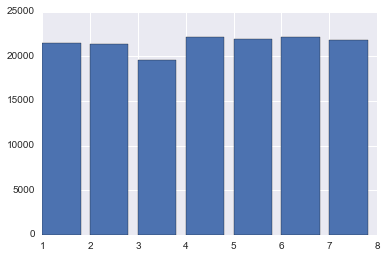

In [148]:
trade_tt['time_weekday'] = trade_tt['time'].apply(lambda x : x.weekday())
plt.bar(range(1,8,1),trade_tt.groupby('time_weekday').size())

<Container object of 7 artists>

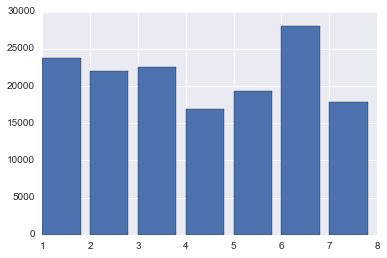

In [5]:
%matplotlib inline
trade_tt['month'] = trade_tt['time'].apply(lambda x : x.month)
plt.bar(range(1,8,1),trade_tt.groupby('month').size())

### 不同时间的label分布

In [8]:
trade_train['time'] = trade_train['time'].apply(lambda x : x[0:19]).apply(lambda x : datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))

In [9]:
trade_train['month'] = trade_train['time'].apply(lambda x : x.month)

In [11]:
trade_train['day'] = trade_train['time'].apply(lambda x : x.day)

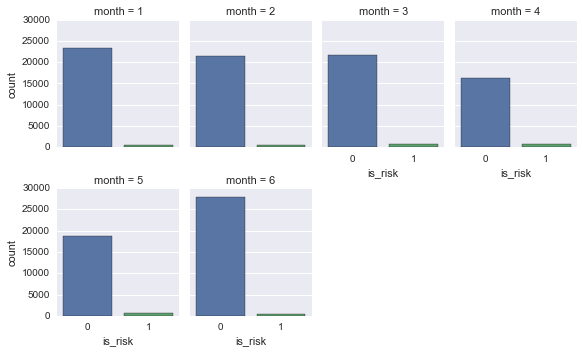

In [10]:
%matplotlib inline
g = sns.factorplot("is_risk", col="month", col_wrap=4,
              data=trade_train,
                kind="count", size=2.5, aspect=.8)

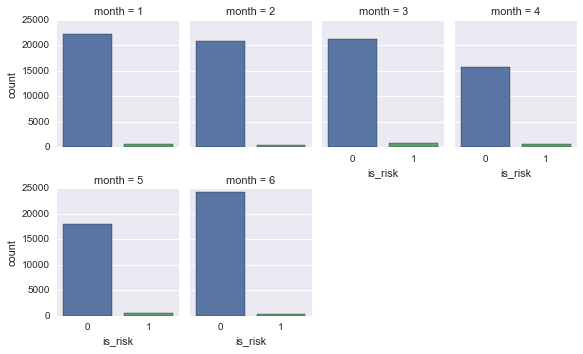

In [12]:
%matplotlib inline
g = sns.factorplot("is_risk", col="month", col_wrap=4,
              data=trade_train[trade_train['day']!=18],
                kind="count", size=2.5, aspect=.8)

In [22]:
temp = trade_train.groupby(['month','is_risk']).size().unstack()

In [27]:
temp['rate'] = temp[0]/temp[1]

In [24]:
temp['rate']

month
1    39.496599
2    45.591102
3    24.668942
4    22.308540
5    28.389650
6    86.607477
Name: rate, dtype: float64

In [25]:
temp = trade_train[trade_train['day']!=18].groupby(['month','is_risk']).size().unstack()
temp['rate'] = temp[0]/temp[1]

In [28]:
temp['rate']

month
1    38.793345
2    46.188889
3    24.994090
4    21.822873
5    27.955039
6    77.485623
Name: rate, dtype: float64

<Container object of 30 artists>

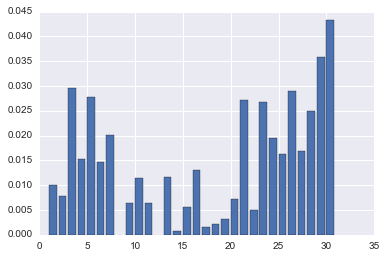

In [36]:
temp = trade_train[trade_train['month']==6].groupby(['day','is_risk']).size().unstack()
temp['rate'] = temp[1]/temp[0]
plt.bar(range(1,len(temp['rate'])+1,1),temp['rate'])

<Container object of 31 artists>

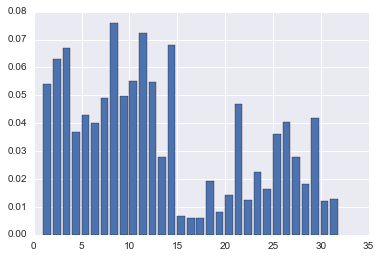

In [37]:
temp = trade_train[trade_train['month']==5].groupby(['day','is_risk']).size().unstack()
temp['rate'] = temp[1]/temp[0]
plt.bar(range(1,len(temp['rate'])+1,1),temp['rate'])

<Container object of 30 artists>

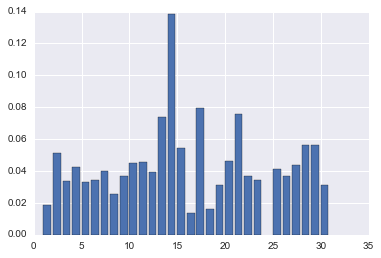

In [38]:
temp = trade_train[trade_train['month']==4].groupby(['day','is_risk']).size().unstack()
temp['rate'] = temp[1]/temp[0]
plt.bar(range(1,len(temp['rate'])+1,1),temp['rate'])

<Container object of 31 artists>

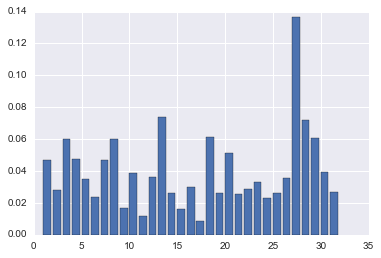

In [39]:
temp = trade_train[trade_train['month']==3].groupby(['day','is_risk']).size().unstack()
temp['rate'] = temp[1]/temp[0]
plt.bar(range(1,len(temp['rate'])+1,1),temp['rate'])

<Container object of 28 artists>

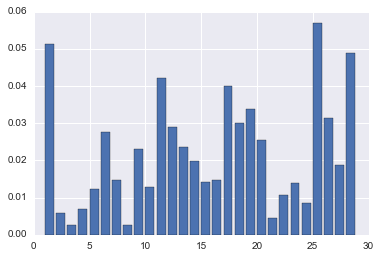

In [40]:
temp = trade_train[trade_train['month']==2].groupby(['day','is_risk']).size().unstack()
temp['rate'] = temp[1]/temp[0]
plt.bar(range(1,len(temp['rate'])+1,1),temp['rate'])

<Container object of 31 artists>

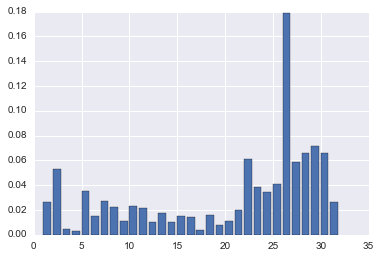

In [41]:
temp = trade_train[trade_train['month']==1].groupby(['day','is_risk']).size().unstack()
temp['rate'] = temp[1]/temp[0]
plt.bar(range(1,len(temp['rate'])+1,1),temp['rate'])

In [42]:
trade_train['weekday'] = trade_train['time'].apply(lambda x : x.weekday())

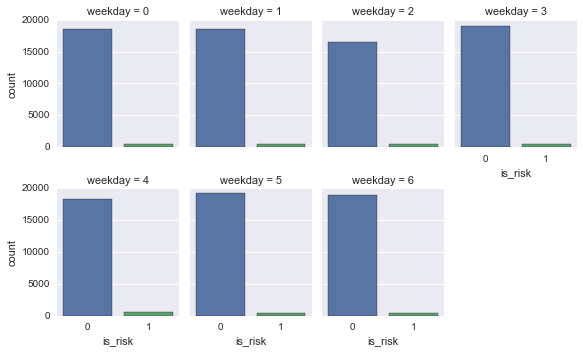

In [43]:
%matplotlib inline
g = sns.factorplot("is_risk", col="weekday", col_wrap=4,
              data=trade_train,
                kind="count", size=2.5, aspect=.8)

<Container object of 7 artists>

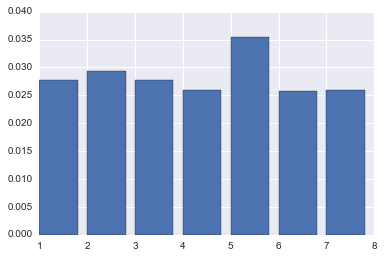

In [44]:
temp = trade_train.groupby(['weekday','is_risk']).size().unstack()
temp['rate'] = temp[1]/temp[0]
plt.bar(range(1,len(temp['rate'])+1,1),temp['rate'])

<Container object of 6 artists>

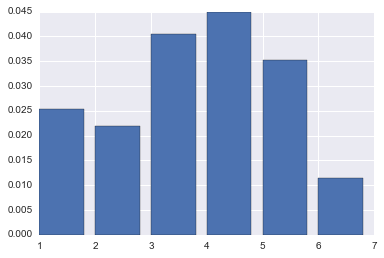

In [45]:
temp = trade_train.groupby(['month','is_risk']).size().unstack()
temp['rate'] = temp[1]/temp[0]
plt.bar(range(1,len(temp['rate'])+1,1),temp['rate'])

## rowkey主键重复 

In [43]:
print(trade_tt['rowkey'].unique().shape)
print(trade_tt.shape)

(147979L,)
(150594, 4)


In [44]:
print(trade_train['rowkey'].unique().shape)
print(trade_train['rowkey'].shape)

(132719L,)
(132719L,)


In [45]:
print(trade_test['rowkey'].unique().shape)
print(trade_test['rowkey'].shape)

(17875L,)
(17875L,)


In [46]:
trade_repeat_rowkey = trade_train.merge(trade_test,how = 'inner',on = 'rowkey',suffixes = ['_train','_test'])

In [47]:
trade_repeat_rowkey

,rowkey,time_train,id_train,is_risk,from_train,time_test,id_test,from_test
0,343,2015-01-01 01:05:47.0,87482,0,train,2015-07-01 07:02:40.0,149605,test
1,700,2015-01-01 07:13:31.0,107099,0,train,2015-07-01 09:00:40.0,149778,test
2,758,2015-01-01 07:53:02.0,75533,0,train,2015-07-01 09:17:10.0,129565,test
3,806,2015-01-01 08:15:22.0,25407,0,train,2015-07-01 09:29:53.0,169889,test
4,812,2015-01-01 08:16:13.0,25407,0,train,2015-07-01 09:31:26.0,10398,test
5,819,2015-01-01 08:19:15.0,34524,0,train,2015-07-01 09:32:39.0,112515,test
6,992,2015-01-01 09:07:47.0,8914,0,train,2015-07-01 10:00:27.0,97686,test
7,1110,2015-01-01 09:30:16.0,42060,0,train,2015-07-01 10:07:34.0,93524,test
8,1349,2015-01-01 10:13:15.0,57105,0,train,2015-07-01 10:41:12.0,83717,test
9,1651,2015-01-01 10:56:17.0,104193,0,train,2015-07-01 11:35:58.0,67332,test


# login表

In [48]:
print(login_tt.columns)

Index([u'log_id', u'timelong', u'device', u'log_from', u'ip', u'city',
       u'result', u'timestamp', u'type', u'id', u'is_scan', u'is_sec', u'time',
       u'from'],
      dtype='object')


##   Id重合情况

In [49]:
unique_in_train = login_train['id'].unique().shape[0]
unique_in_test =  login_test['id'].unique().shape[0]
unique_in_tt = login_tt['id'].unique().shape[0]
print "unique in train, in test and in all is ",unique_in_train,unique_in_test,unique_in_tt
print  "number for IDs in train but not in test in train",(unique_in_tt - unique_in_test)
print u"train中出现但未在test中出现的为",(unique_in_tt - unique_in_test)*1.0/(unique_in_train)
print u"test中出现过但未在train中出现的为",(unique_in_tt - unique_in_train)*1.0/(unique_in_test)

unique in train, in test and in all is  27155 12923 28065
number for IDs in train but not in test in train 15142
train中出现但未在test中出现的为 0.557613699135
test中出现过但未在train中出现的为 0.070417085816


## ID是否都在trade表中出现过？

In [50]:
unique_in_login_train = login_train['id'].unique()
unique_in_login_test =  login_test['id'].unique()
unique_in_login_tt = login_tt['id'].unique()
unique_in_trade_train = trade_train['id'].unique()
unique_in_trade_test =  trade_test['id'].unique()
unique_in_trade_tt = trade_tt['id'].unique()

In [51]:
print "unique number in login's train, test and in all", unique_in_login_train.shape[0], unique_in_login_test.shape[0] ,unique_in_login_tt.shape[0]
print "unique number in trade's train, test and in all", unique_in_trade_train.shape[0], unique_in_trade_test.shape[0] ,unique_in_trade_tt.shape[0]

unique number in login's train, test and in all 27155 12923 28065
unique number in trade's train, test and in all 26044 7272 28065


In [52]:
len(set(list(unique_in_login_tt)+list(unique_in_trade_tt)))

28065

显然就总体而言，所有在login中出现过的id都在trade出现过，反之亦然。两者总量相当，但在trade处train与test的交叠情况较小，因此trade的train/test的size较大

In [53]:
len(set(list(unique_in_login_train)+list(unique_in_trade_train)))

27256

In [54]:
len(set(list(unique_in_login_test)+list(unique_in_trade_test)))

14137

而对应到train或test上，则会有trade与login间id未必在两边都出现过的情况。

## ID出现次数分布

In [65]:
login_train_id_times = login_train[['id']].groupby('id').size()
login_test_id_times = login_test[['id']].groupby('id').size()

(array([ 13495.,   4618.,   2600.,   1859.,   1060.,    668.,    573.,
           368.,    291.,    257.]),
 array([  1. ,   8.3,  15.6,  22.9,  30.2,  37.5,  44.8,  52.1,  59.4,
         66.7,  74. ]),
 <a list of 10 Patch objects>)

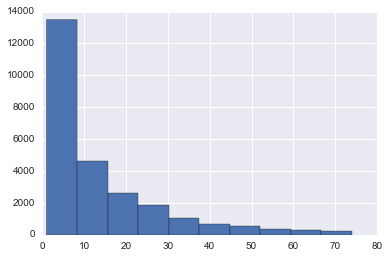

In [78]:
qt_login_train = login_train_id_times.quantile(.95)
plt.hist(login_train_id_times[login_train_id_times< qt_login_train])

(array([ 13495.,   4618.,   2600.,   1859.,   1060.,    668.,    573.,
           368.,    291.,    257.]),
 array([  1. ,   8.3,  15.6,  22.9,  30.2,  37.5,  44.8,  52.1,  59.4,
         66.7,  74. ]),
 <a list of 10 Patch objects>)

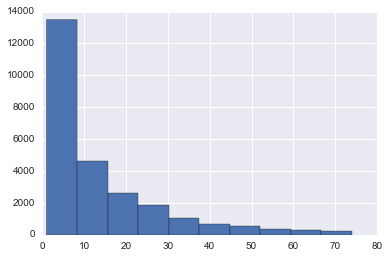

In [77]:
qt_login_train = login_train_id_times.quantile(.95)
plt.hist(login_train_id_times[login_train_id_times< qt_login_train])

(array([ 14072.,   4779.,   2719.,   1700.,   1087.,    760.,    538.,
           401.,    308.,    273.]),
 array([  1. ,   9.1,  17.2,  25.3,  33.4,  41.5,  49.6,  57.7,  65.8,
         73.9,  82. ]),
 <a list of 10 Patch objects>)

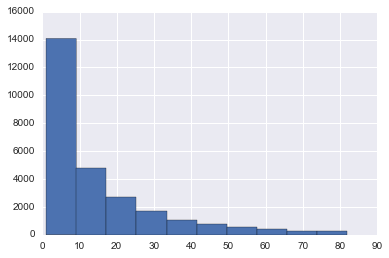

In [110]:
login_id_times = login_tt[['id']].groupby('id').size()
qt_login_tt = login_id_times.quantile(.95)
plt.hist(login_id_times[login_id_times< qt_login_tt])

In [112]:
login_id_times[login_id_times<2].shape

(1742L,)

In [113]:
login_id_times[login_id_times<3].shape

(3821L,)

In [114]:
login_id_times[login_id_times<4].shape

(6614L,)

## Device与ID关系 

In [9]:
hist_divice = login_tt.groupby(['id','device']).size().reset_index()
hist_divice = hist_divice.rename(columns = {0:'login_times'})

In [92]:
id_device_counts = hist_divice.groupby('id').size()

In [94]:
id_device_counts.describe()

count    28065.000000
mean         6.349938
std         12.009825
min          1.000000
25%          2.000000
50%          4.000000
75%          7.000000
max        849.000000
dtype: float64

(array([ 8567.,  7597.,  2262.,  3276.,  1106.,  1559.,   985.,   357.,
          508.,   378.]),
 array([  1. ,   2.6,   4.2,   5.8,   7.4,   9. ,  10.6,  12.2,  13.8,
         15.4,  17. ]),
 <a list of 10 Patch objects>)

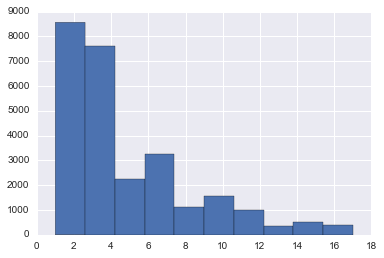

In [95]:
qt = id_device_counts.quantile(0.95)
plt.hist(id_device_counts[id_device_counts<qt])

### 是否存在device被多个id共享

In [10]:
device_ID_counts = hist_divice.groupby('device').size()

In [14]:
device_ID_counts.sum() - device_ID_counts.shape[0]

13679L

In [15]:
device_ID_counts.describe()

count    164532.000000
mean          1.083139
std          24.732807
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max       10015.000000
dtype: float64

In [17]:
device_ID_counts.sort_values(ascending = False)[0:10]

device
835072    10015
274216      480
225121      180
837955      139
253357      130
623045      122
541575       82
743811       82
78065        75
667654       73
dtype: int64

## Login timestamp/time


### Time and timestamp

In [131]:
login_tt['time'] = login_tt['time'].apply(lambda x : datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))

In [135]:
login_tt['timestamp'].iloc[0]

1428641659.0

In [139]:
login_tt['timestamp'] = login_tt['timestamp'].apply(lambda x : datetime.datetime.fromtimestamp(x))

In [144]:
np.sum(login_tt['timestamp']!=login_tt['time'])

0

## login time distribution

<Container object of 7 artists>

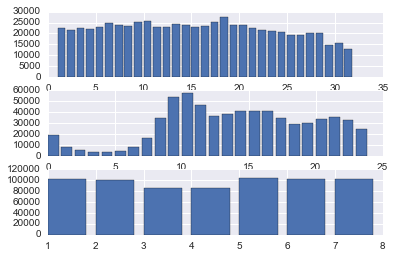

In [150]:
login_tt['time_day'] = login_tt['time'].apply(lambda x : x.day)
login_tt['time_hour'] = login_tt['time'].apply(lambda x : x.hour)
login_tt['time_weekday'] = login_tt['time'].apply(lambda x : x.weekday())
plt.subplot(311)
plt.bar(range(1,32,1),login_tt.groupby('time_day').size())
plt.subplot(312)
plt.bar(range(24),login_tt.groupby('time_hour').size())
plt.subplot(313)
plt.bar(range(1,8,1),login_tt.groupby('time_weekday').size())

In [151]:
login_tt['time_month'] = login_tt['time'].apply(lambda x : x.month)

# ip,city and log from

In [20]:
login_ip_city_from_count = login_tt.groupby(['ip','city','log_from']).size()

In [22]:
login_ip_city_from_count = login_ip_city_from_count.reset_index()

In [24]:
login_ip_city_from_count = login_ip_city_from_count.rename(columns = {0:'counting'})

In [26]:
login_ip_city_from_count['log_from'].unique()

array([ 1,  2, 11, 10, 21, 16,  8, 18,  3, 12,  5], dtype=int64)

### ip与city对应关系 

In [29]:
login_ip_city_count  = login_ip_city_from_count[['ip','city']].drop_duplicates().groupby('city').size().reset_index()

In [31]:
login_ip_city_count = login_ip_city_count.rename(columns ={0:'ip_counts'})

In [33]:
login_ip_city_count.describe()

,city,ip_counts
count,484.000000,484.000000
mean,267.725207,536.082645
std,157.995272,1832.966730
min,1.000000,1.000000
25%,127.750000,17.000000
50%,261.500000,110.000000
75%,407.250000,350.000000
max,555.000000,28857.000000


In [34]:
login_city_ip_count  = login_ip_city_from_count[['ip','city']].drop_duplicates().groupby('ip').size().reset_index().rename(columns ={0:'city_counts'})

In [39]:
login_city_ip_count['city_counts'].sum() - login_city_ip_count.shape[0]

0L

### type 

In [41]:
login_tt['type'].unique()

array([1, 3, 2], dtype=int64)

### type, is_scan, is_sec

In [43]:
login_tt[['type','is_sec','is_scan']].drop_duplicates()

,type,is_sec,is_scan
0,1,False,True
1,1,False,False
6,3,False,False
15,2,False,False


In [44]:
login_tt['is_sec'].unique()

array([False], dtype=object)

### type and device

In [45]:
device_type_count = login_tt[['type','device']].drop_duplicates().groupby('device').size()

In [47]:
device_type_count.sum() - device_type_count.shape[0]

6362L

In [52]:
mult_type_divice = list(device_type_count[device_type_count>1].index)

In [56]:
login_tt['mult_type_device_counting']=login_tt['device'].apply(lambda x : device_type_count[x])

In [60]:
login_tt[login_tt['mult_type_device_counting'] >1][['type','mult_type_device_counting']].drop_duplicates()

,type,mult_type_device_counting
1,1,3
15,2,2
37,3,3
93,1,2
107,3,2
235,2,3


### ip与device关系

In [6]:
#ip分布
print login_tt['ip'].unique().shape
print login_tt.shape

(259464L,)
(683393, 14)


In [12]:
#一个用户对多个ip
%matplotlib inline
ip_usage = login_tt[['id','ip']].drop_duplicates().groupby('id').size()
ip_usage.describe()

count    28065.000000
mean        10.242900
std         19.188864
min          1.000000
25%          2.000000
50%          5.000000
75%         11.000000
max       1160.000000
dtype: float64

(array([  7.13400000e+03,   6.42700000e+03,   5.62400000e+03,
          4.50900000e+03,   2.88900000e+03,   1.03800000e+03,
          3.61000000e+02,   7.50000000e+01,   6.00000000e+00,
          2.00000000e+00]),
 array([ 0.        ,  0.70561753,  1.41123506,  2.11685259,  2.82247011,
         3.52808764,  4.23370517,  4.9393227 ,  5.64494023,  6.35055776,
         7.05617528]),
 <a list of 10 Patch objects>)

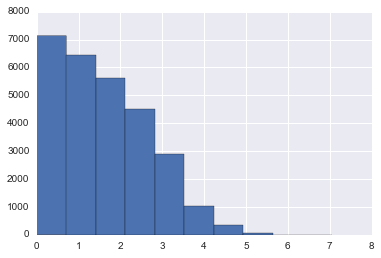

In [14]:
plt.hist(np.log(ip_usage))

In [15]:
#一个ip对多个用户
ip_id_count = login_tt[['id','ip']].drop_duplicates().groupby('ip').size()
ip_id_count.describe()

count    259464.000000
mean          1.107926
std           0.778955
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         110.000000
dtype: float64

In [18]:
ip_id_count.sort_values(ascending = False)

ip
1078386    110
451870      54
311603      50
1248846     49
1025308     48
211765      45
31326       45
1343219     44
1048924     44
765932      39
418854      38
884505      37
1232175     36
1200818     35
1242277     34
942358      34
557198      33
883579      30
51855       29
208299      29
1412870     28
50816       28
695072      28
396089      27
940751      27
1481201     26
860662      25
328308      25
1286986     24
487745      24
          ... 
1029744      1
1029746      1
1029869      1
1029974      1
1029971      1
1029965      1
1029964      1
1029957      1
1029933      1
1029904      1
1029900      1
1029896      1
1029890      1
1029889      1
1029888      1
1029862      1
1029761      1
1029843      1
1029838      1
1029829      1
1029826      1
1029819      1
1029815      1
1029789      1
1029784      1
1029780      1
1029773      1
1029771      1
1029769      1
4            1
dtype: int64

In [20]:
print ip_id_count.shape
print ip_id_count[ip_id_count>3].shape

(259464L,)
(2872L,)


(array([  2.59273000e+05,   1.54000000e+02,   2.10000000e+01,
          9.00000000e+00,   6.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([   1. ,   11.9,   22.8,   33.7,   44.6,   55.5,   66.4,   77.3,
          88.2,   99.1,  110. ]),
 <a list of 10 Patch objects>)

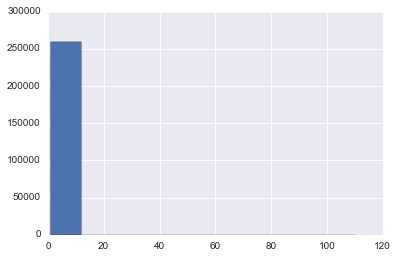

In [17]:
plt.hist(ip_id_count)

###  timelong

In [116]:
login_tt['timelong'].describe()

count    6.833930e+05
mean     2.164032e+04
std      7.433134e+05
min     -1.355000e+03
25%      4.623000e+03
50%      7.272000e+03
75%      1.312600e+04
max      2.253800e+08
Name: timelong, dtype: float64

(array([ 113785.,  226393.,  142583.,   64633.,   39278.,   23899.,
          15375.,   10355.,    7353.,    5569.]),
 array([ -1355. ,   2925.6,   7206.2,  11486.8,  15767.4,  20048. ,
         24328.6,  28609.2,  32889.8,  37170.4,  41451. ]),
 <a list of 10 Patch objects>)

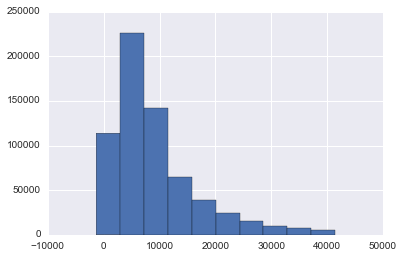

In [121]:
qt = login_tt['timelong'].quantile(0.95)
plt.hist(login_tt.ix[login_tt['timelong']< qt,'timelong'])

In [131]:
timelong_log = np.log(login_tt.ix[login_tt['timelong']< qt,'timelong']+2000)

In [132]:
timelong_log.min()

6.4692503167957724

(array([  1.00000000e+00,   4.00000000e+00,   3.86060000e+04,
          2.78870000e+04,   6.70660000e+04,   1.39007000e+05,
          1.84392000e+05,   1.01027000e+05,   6.12630000e+04,
          2.99700000e+04]),
 array([  6.46925032,   6.8902642 ,   7.31127808,   7.73229197,
          8.15330585,   8.57431973,   8.99533361,   9.4163475 ,
          9.83736138,  10.25837526,  10.67938915]),
 <a list of 10 Patch objects>)

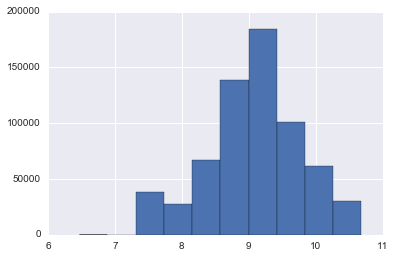

In [133]:
plt.hist(timelong_log)

### log_from各项比例

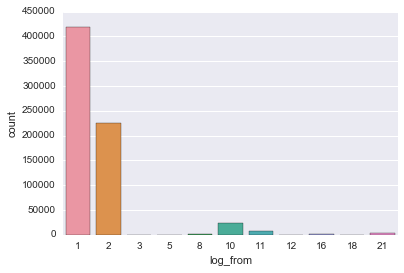

In [15]:
sns.countplot(x= 'log_from',data =login_tt)

### city分布情况

In [16]:
login_tt.city.unique().shape

(484L,)

In [21]:
login_city_count = login_tt.groupby('city').size().reset_index().rename(columns = {0:'city_login_count'}).sort_values(by = 'city_login_count',ascending = False)

In [22]:
login_city_count[0:10]

,city,city_login_count
174,194,105178
323,364,41486
218,238,32625
40,44,24564
18,21,21591
59,63,16569
74,78,14623
440,488,14210
54,58,13089
256,277,12030


(array([  55.,   30.,   30.,   52.,   87.,  125.,   70.,   24.,    9.,    2.]),
 array([  0.        ,   1.15634094,   2.31268189,   3.46902283,
          4.62536377,   5.78170472,   6.93804566,   8.0943866 ,
          9.25072755,  10.40706849,  11.56340943]),
 <a list of 10 Patch objects>)

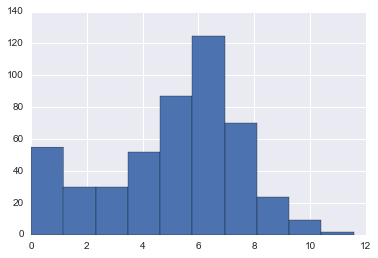

In [23]:
plt.hist(np.log(login_city_count['city_login_count']))

### 登录result分布情况 

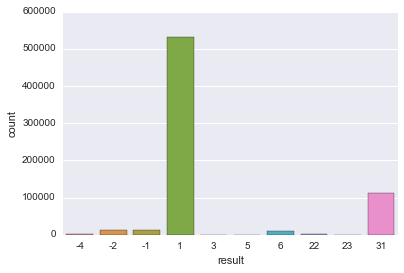

In [25]:
sns.countplot(x= 'result',data =login_tt)

In [26]:
login_tt['result'].unique()

array([ 1, 31, -2, -4,  6, 22, -1,  5, 23,  3], dtype=int64)

### type分布情况

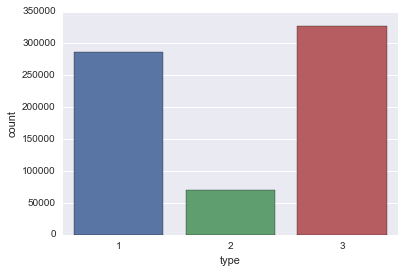

In [27]:
sns.countplot(x= 'type',data =login_tt)

### is_scan分布情况 

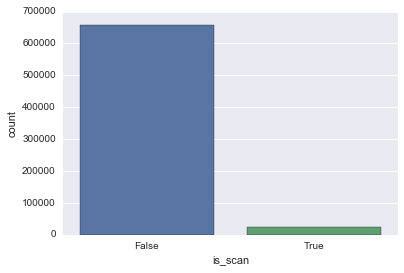

In [28]:
sns.countplot(x= 'is_scan',data =login_tt)